In [ ]:
"""
Case_01

https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/
"""
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedKFold
import time

'''
PreProcessing
''' 
#Loading Database
df_case_01 = pd.read_csv(r'Case_01_data.csv')

#Transforming to DataFrame
df_case_01 = pd.DataFrame(df_case_01)
df_case_01 = df_case_01.drop(columns='run')

#Transforming to NumpyArray
df_case_01 = df_case_01.to_numpy()

'''
Inputs
'''
X = df_case_01[:, [0, 1, 2, 3]]

#1 --> Yeast Extract (g/L) --> index: 0
#2 --> Whey (g/L) --> index: 1
#3 --> Autoclave Temperature (ºC) --> index: 2
#4 --> Seawater (%) --> index: 3

'''
Outputs
'''
y = df_case_01[:, [4]] 

#1 --> Response: SUA (Mm urea hydrolyzed.min-1.OD-1) --> index: 4

'''
#Scaling the and preparing the data
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

#Scaling the Data
scaledX = scalerX.fit_transform(X)
scaledY = scalerY.fit_transform(y)
'''
#Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.15)

In [ ]:
#CrossVal
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#Random forest Model
model = RandomForestRegressor(bootstrap = 'True', n_estimators = 50, max_depth = 30,
                              min_samples_split = 2, min_samples_leaf = 1)

In [ ]:
#Repeated k-Fold
cv = RepeatedKFold(n_splits = 10, n_repeats = 10)

#Initial time
start_time = time.time()

# Cross_Val_Score
scores = cross_val_score(model, X, y, cv = cv, scoring = 'neg_mean_squared_error', n_jobs = 1)

#Final time
end_time = (time.time() - start_time)
print('The running time is: %.2f minutes' %(end_time/60))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

The running time is: 0.11 minutes


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
#mse
mse = abs(scores.mean())
mse

2.1371859421481387

Annotate:

Single Layer kfold = 10 n_repeat = 10 // activation = relu-linear

n_estimator (10):
----------------
mse: 2.5020

time: 0.03 minutes

n_estimator (25):
----------------
mse: 2.8335

time: 0.06 minutes

n_estimator (50):
----------------
mse: 2.30

time: 0.10 minutes

n_estimator (100):
----------------
mse: 2.13

time: 0.21 minutes

n_estimator (200):
----------------
mse: 2.21

time: 0.36 minutes

## Ploting

In [ ]:
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

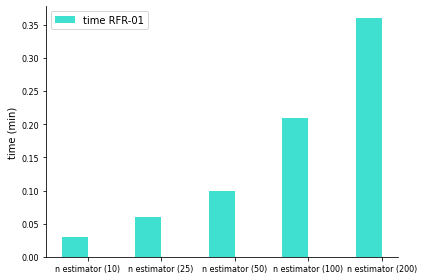

In [ ]:
#RF-01-timeprocessing
df_metrics_mae_fs = pd.DataFrame({'n estimator':['n estimator (10)', 'n estimator (25)', 'n estimator (50)', 'n estimator (100)',
                              'n estimator (200)'], 'RF-01 mse': [.03, .06, .1, .21, .36]})

labels = ['n estimator (10)', 'n estimator (25)', 'n estimator (50)', 'n estimator (100)', 'n estimator (200)']
time_RF_01 = [.03, .06, .1, .21, .36]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, time_RF_01, width, label = 'time RFR-01', color = 'turquoise')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('time (min)')
#ax.set_xlabel('Model')
#ax.set_title('Mae (kPa) by Random Forest and DNN - fs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis = 'both', which='major', labelsize=8)
ax.legend()
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
plt.savefig('RFR-01-time', dpi = 600)
plt.show()

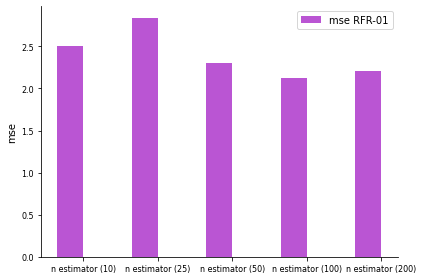

In [ ]:
#RF-01-mse
df_metrics_mae_fs = pd.DataFrame({'n estimator':['n estimator (10)', 'n estimator (25)', 'n estimator (50)', 'n estimator (100)',
                              'n estimator (200)'], 'RF-01 mse': [2.5020, 2.8335, 2.30, 2.13, 2.21]})

labels = ['n estimator (10)', 'n estimator (25)', 'n estimator (50)', 'n estimator (100)', 'n estimator (200)']
mse_RF_01 = [2.5020, 2.8335, 2.30, 2.13, 2.21]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_RF_01, width, label = 'mse RFR-01', color = 'mediumorchid')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mse')
#ax.set_xlabel('Model')
#ax.set_title('Mae (kPa) by Random Forest and DNN - fs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis = 'both', which='major', labelsize=8)
ax.legend()
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
plt.savefig('RFR-01-mse', dpi = 600)
plt.show()

In [ ]:
#Loading Database
df_case_01 = pd.read_csv(r'Case_01_data.csv')
df_case_01 = df_case_01.drop(columns='run')
df_case_01
df_case_01 = df_case_01.rename(columns= {'Response: SUA (Mm urea hydrolyzed.min-1.OD-1)': 'SUA'})
df_case_01 = df_case_01.rename(columns= {'Autoclave Temperature (ºC)': 'Temperature (ºC)'})

In [ ]:
df_case_01

,Yeast Extract (g/L),Whey (g/L),Temperature (ºC),Seawater (%),SUA
0,3.43,3.43,78.6,14.64,0.61
1,20.00,3.43,78.6,14.64,1.32
2,3.43,20.00,78.6,14.64,3.65
3,20.00,20.00,78.6,14.64,4.49
4,3.43,3.43,120.0,14.64,1.26
5,20.00,3.43,120.0,14.64,3.16
6,3.43,20.00,120.0,14.64,13.11
7,20.00,20.00,120.0,14.64,10.93
8,3.43,3.43,78.6,85.36,0.63
9,20.00,3.43,78.6,85.36,1.67


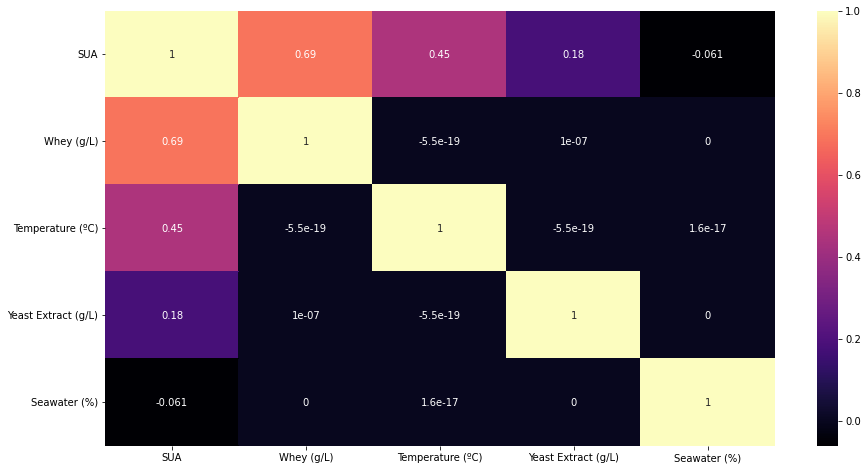

In [ ]:
k = 10 #number of variables for heatmap
cols = df_case_01.corr().nlargest(k, 'SUA')['SUA'].index
cm = df_case_01[cols].corr()
plt.figure(figsize=(15, 8))
#plt.title('Correlation of Variables')
sns.heatmap(cm, annot = True, cmap = 'magma')
plt.savefig('Case-01-Correlation', dpi = 300)